#  Credit Card Fraud Detection

## Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

![](https://www.xenonstack.com/wp-content/uploads/xenonstack-credit-card-fraud-detection.png)

## Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

## Project Pipeline
The project pipeline can be briefly summarized in the following four steps:

**Data Understanding:** Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.<br>

**Exploratory data analytics (EDA):** Normally, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.<br>

**Train/Test Split:** Now you are familiar with the train/test split, which you can perform in order to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.<br>

**Model-Building/Hyperparameter Tuning:** This is the final step at which you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given dataset. You should try and see if you get a better model by the various sampling techniques.<br>

**Model Evaluation:** Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. Choose an appropriate evaluation metric which reflects this business goal.

<a id='1'></a><br>
## Step 1: Reading and Understanding the Data

In [2]:
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
#pd.options.display.float_format='{:.4f}'.format
#plt.rcParams['figure.figsize'] = [8,8]
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1) 
#sns.set(style='darkgrid')
#import matplotlib.ticker as plticker
#%matplotlib inline

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
# Local file path.Please change the path accordingly.

path = r"C:\Users\swani\Downloads\creditcard.csv"


In [5]:
# Reading the Credit Card file on which analysis needs to be done

df_card = pd.read_csv(path)
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [6]:
# Shape of the Credit card dataframe

df_card.shape

(284807, 31)

#### Inference:
We got `284807` records and `31` columns in our dataset.

In [7]:
# Data Description

df_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [8]:
# Data Information

df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<a id='2'></a><br>
## Step 2 : Data Cleansing

We need to perform basic cleansing check in order to feed correct data to the model.

In [9]:
# Calculating the Missing Value% in the DF

df_null = df_card.isnull().mean()*100
df_null.sort_values(ascending=False).head()

Time     0.0000
V16      0.0000
Amount   0.0000
V28      0.0000
V27      0.0000
dtype: float64

We observed in the dataset has no null values and Hence, no Null treatment is required.

In [10]:
# Datatype check for the dataframe

df_card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

#### Inference:
None of the columns have inconsistent datatype.Hence, no conversion is required.

<a id='3'></a><br>
## Step 3 : Data Visualization

#### Visualizing the Distribution of `Fraudulent` Variable

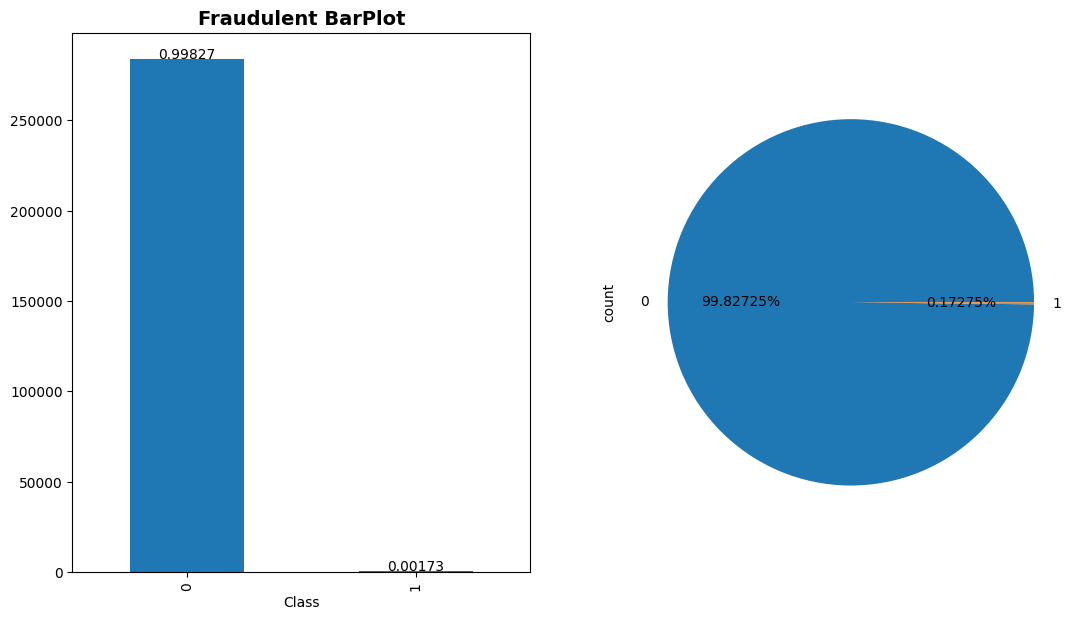

In [11]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title('Fraudulent BarPlot', fontweight='bold',fontsize=14)
ax = df_card['Class'].value_counts().plot(kind='bar')
total = float(len(df_card))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.5f}'.format(height/total),
            ha="center") 


plt.subplot(122)
df_card["Class"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

In [12]:
classes=df_card['Class'].value_counts()
normal_share=classes[0]/df_card['Class'].count()*100
fraud_share=classes[1]/df_card['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


In this scenario accuracy score to evaluate our classification algorithm will not be correct.Just using accuracy as the evaluation metric will predit every case as `0` Non Fraud and hence it would be wrong.

[None, None]

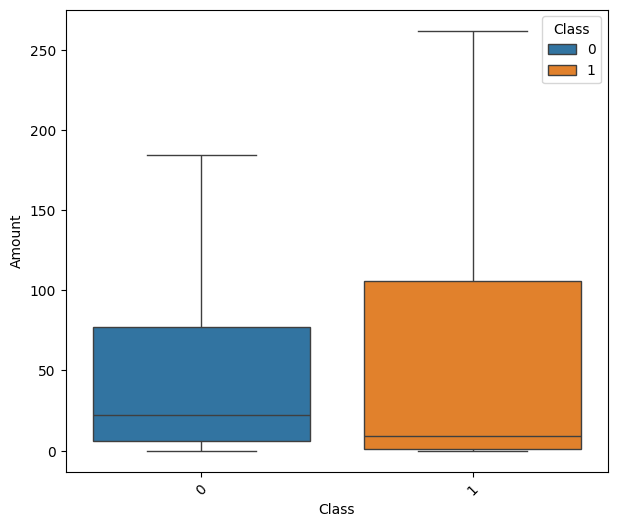

In [13]:
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df_card,showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=45)

Text(0, 0.5, 'Density')

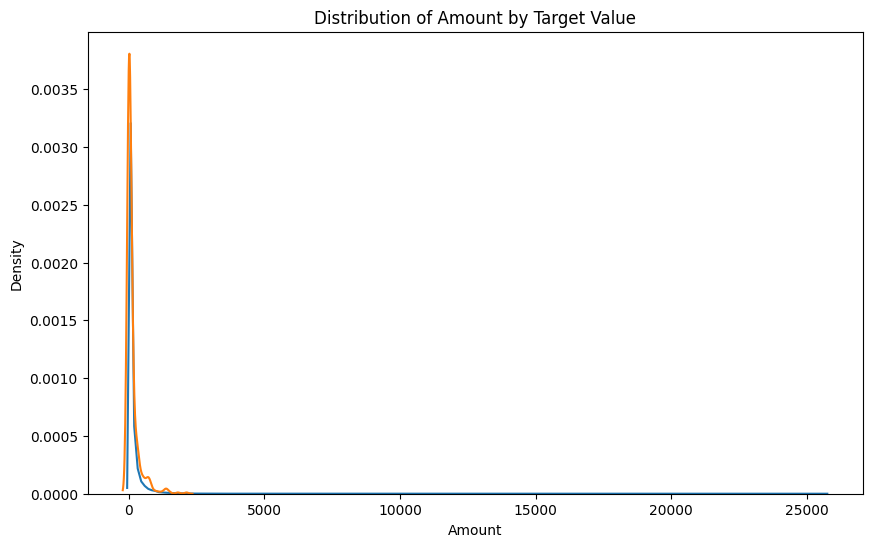

In [14]:
# KDE plot to visualize the distribution of Amount for both the classes
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(df_card.loc[df_card['Class'] == 0, 'Amount'], label = 'Non Fraud')
sns.kdeplot(df_card.loc[df_card['Class'] == 1, 'Amount'], label = 'Fraud')
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')

#### Inference:

- The distribution of amount for Fraud transactions is much higher than non-fradualent transactions. 

<Axes: title={'center': 'Distribution of Transaction Time'}, ylabel='Density'>

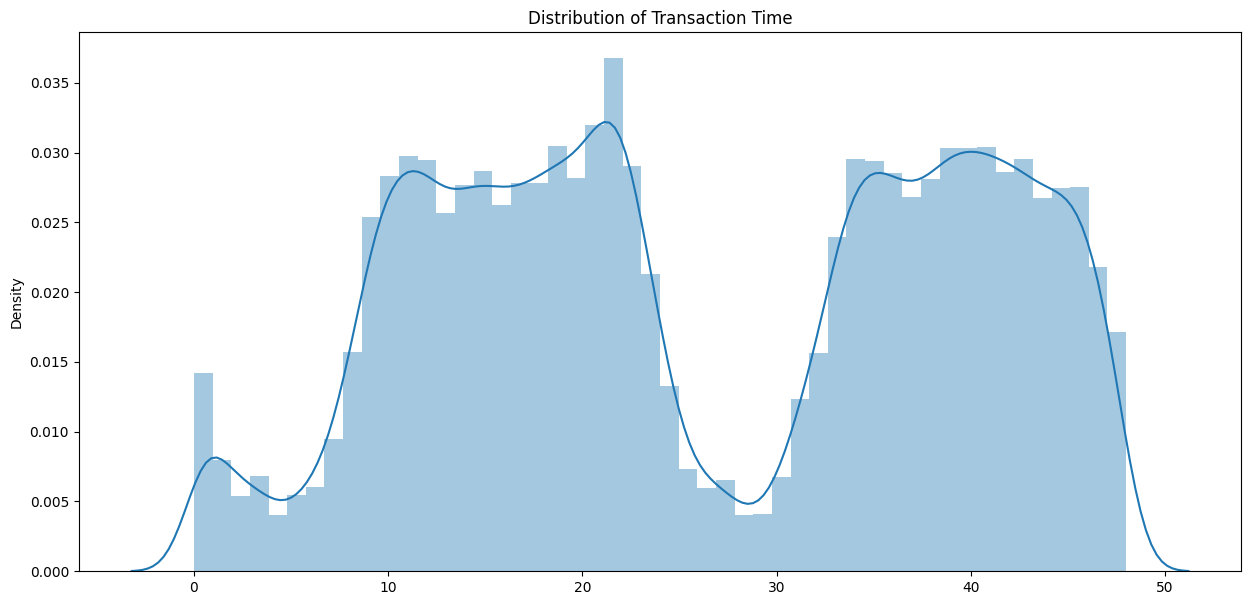

In [15]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df_card['Time'].values/(60*60))

In [16]:
# Storing Fraud and non-Fraud transactions 

df_nonfraud = df_card[df_card.Class == 0]
df_fraud = df_card[df_card.Class == 1]

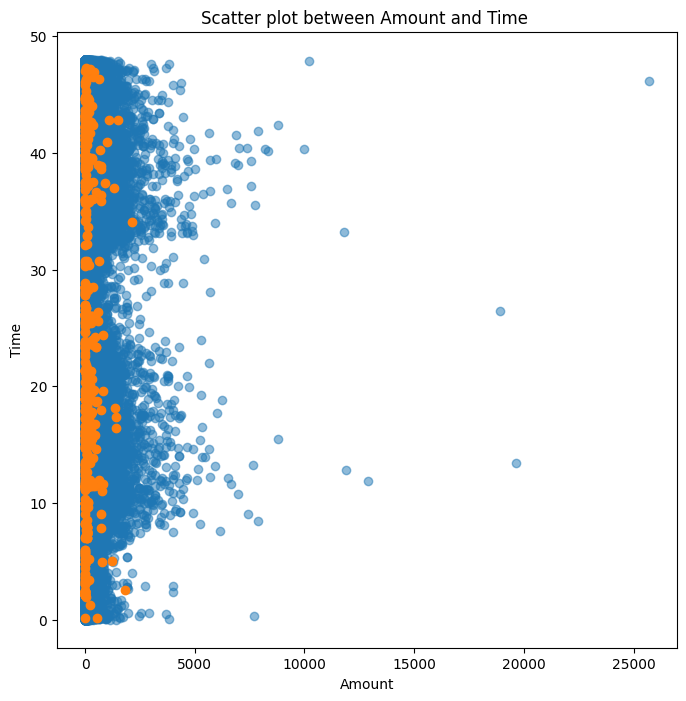

In [17]:
#Scatter plot between Time and Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Amount, df_nonfraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.show()

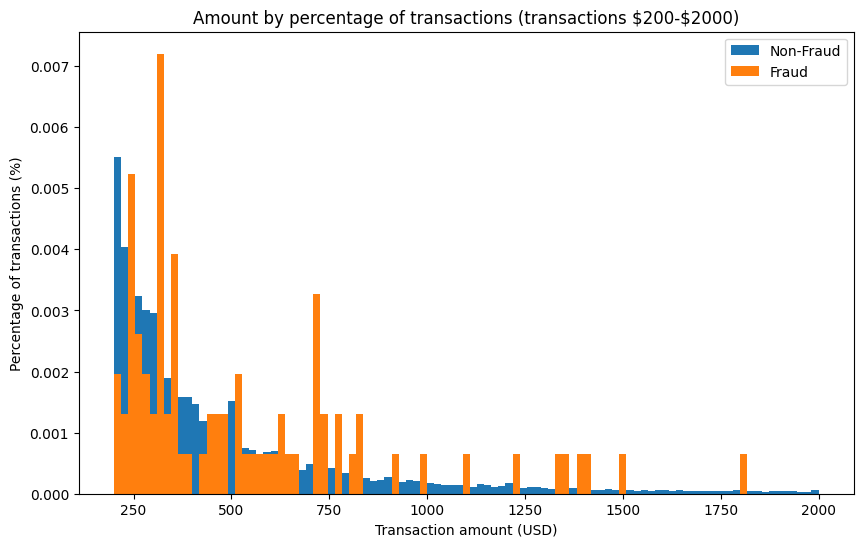

In [18]:
# Plot of high value transactions($200-$2000)

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

#### Inference:

- In the long tail, fraud transaction happened more frequently.

- It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

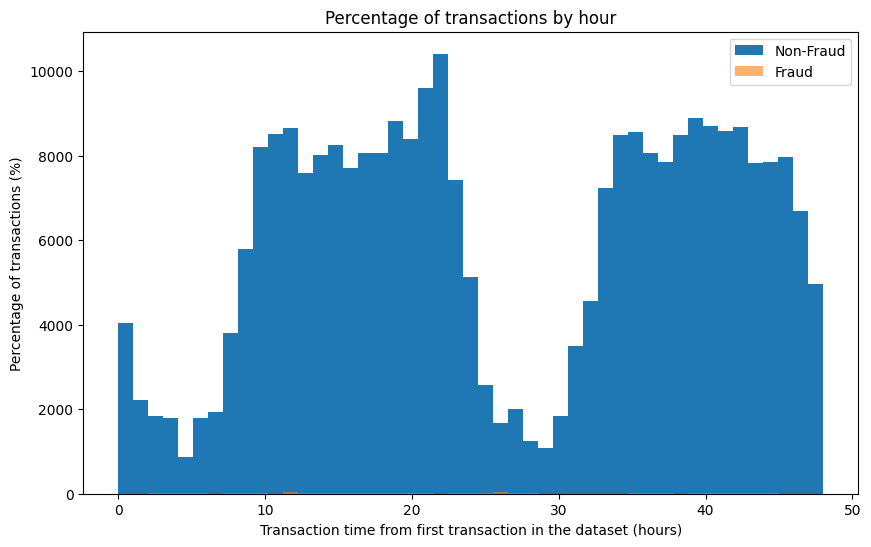

In [19]:
# Plot of transactions in 48 hours

bins = np.linspace(0, 48, 48)
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1,label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6,label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

#### Inference:
Hour `zero` corresponds to the hour the first transaction happened and not necessarily `12-1 AM`. Given the heavy decrease in normal transactions from hours `1` to `8` and again roughly at hours `24` to `32`, 
it seems fraud tends to occur at higher rates during the night.

<a id='4'></a><br>
## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [20]:
# Putting the feature variable into X

X = df_card.drop(['Class'],axis = 1)
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900


In [21]:
# Putting the Target variable to y

y = df_card['Class']

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
# Splitting the data into Train and Test set
kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc, X.iloc
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


Text(0, 0.5, 'Count')

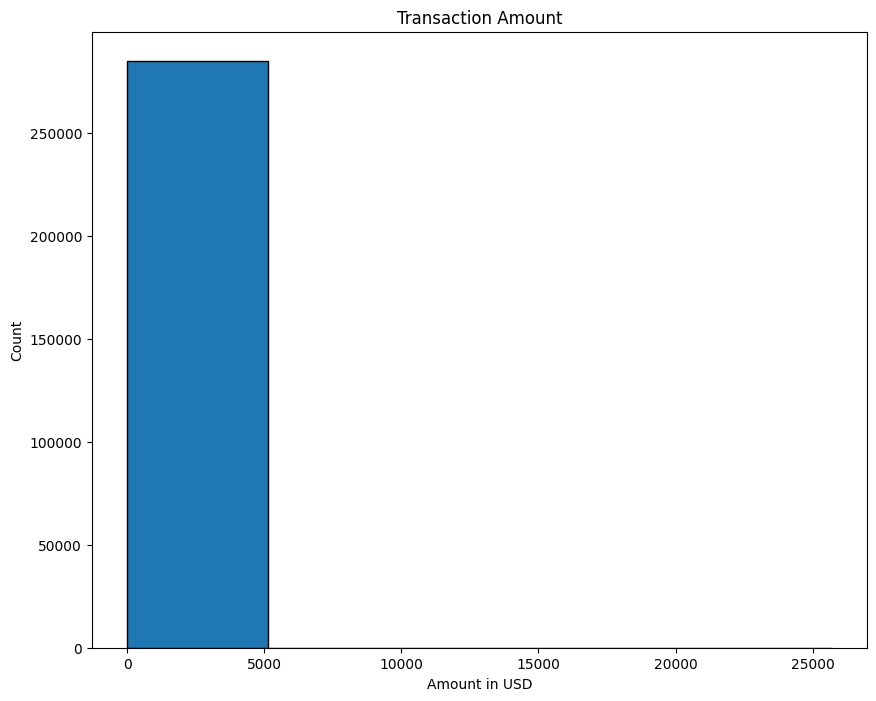

In [24]:
# Checking Skewness of data

plt.rcParams['figure.figsize'] = [10,8]
plt.hist(df_card['Amount'],edgecolor='k',bins = 5)
plt.title('Transaction Amount')
plt.xlabel('Amount in USD') 
plt.ylabel('Count')

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

In [26]:
pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)


## Step 5: Building a Logistic Model

Here,instead of `Accuracy` we are very much interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions.
Increase of Recall comes at a price of Precision. In this case predicting a transaction fradulant which actually is not is not a big concern.

## Imbalanced Data Set

### Logistic Regression

#### Model 1 : Logistic Regression on Imbalanced Data

In [29]:
# Splitting dataset into test and train sets in 70:30 ratio after applying Power Transform

kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(PWTR_X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = PWTR_X[train_index], PWTR_X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


In [34]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to train data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

In [35]:
# Predict on test data
y_predicted = model_lr.predict(X_test)

In [36]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.58      0.69       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   62    86]]
Logistic Regression Accuracy:  0.9990988144142879
ROC AUC :  0.7904526104156797


In [37]:
# Function for roc_curve
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [38]:
# tpr and fpr
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

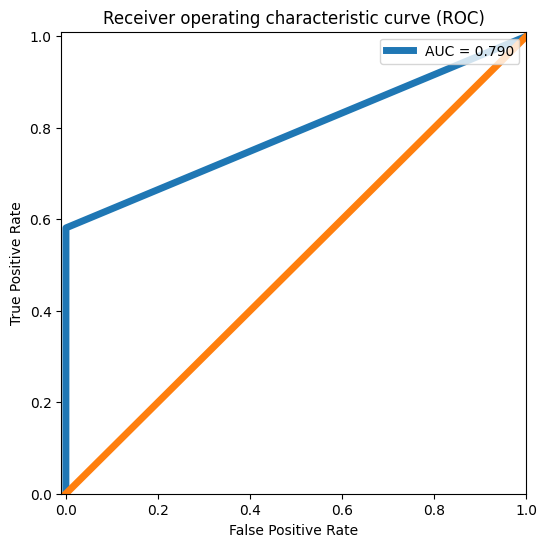

In [39]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Precision : 0.86
- Recall : 0.60
- F1-score : 0.70
- Accuracy : 0.85
- ROC AUC : 0.80

#### Hyperparameter Tuning Logisitic Regression

#### Model 2 : Logistic Regression on Imbalanced Data with K-Fold and Hypertuning

In [42]:
from imblearn.metrics import sensitivity_specificity_support

In [41]:
pip install imblearn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   -------------------------- ------------- 174.1/258.0 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Number of folds

n_folds = 5
# parameters 
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

lrh = LogisticRegression()

model_lrh = GridSearchCV(estimator=lrh, cv=n_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [44]:
# Fitting the model

model_lrh.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [46]:
pd.DataFrame(model_lrh.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.7010,0.0633,0.0000,0.0000,0.1000,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,3.0024,0.2459,0.0780,0.0328,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.9645,0.9927,0.9908,0.9773,0.9735,0.9798,0.0107,7
2,0.3896,0.2857,0.0000,0.0000,0.5000,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,2.5241,0.2543,0.0913,0.0262,0.5000,l2,"{'C': 0.5, 'penalty': 'l2'}",0.9639,0.9939,0.9902,0.9775,0.9730,0.9797,0.0111,8
4,0.2082,0.0272,0.0000,0.0000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,2.3542,0.5389,0.0878,0.0246,1,l2,"{'C': 1, 'penalty': 'l2'}",0.9645,0.9939,0.9901,0.9775,0.9731,0.9798,0.0109,1
6,0.2516,0.0354,0.0000,0.0000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,2.7000,0.3738,0.0677,0.0084,2,l2,"{'C': 2, 'penalty': 'l2'}",0.9645,0.9938,0.9901,0.9776,0.9730,0.9798,0.0108,2
8,0.2022,0.0188,0.0000,0.0000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,2.8260,0.5580,0.0769,0.0197,3,l2,"{'C': 3, 'penalty': 'l2'}",0.9645,0.9938,0.9901,0.9776,0.9730,0.9798,0.0108,3


In [47]:
print("Logistic Regression with PCA Best AUC : ", model_lrh.best_score_)
print("Logistic Regression with PCA Best hyperparameters: ", model_lrh.best_params_)

Logistic Regression with PCA Best AUC :  0.9798283263181405
Logistic Regression with PCA Best hyperparameters:  {'C': 1, 'penalty': 'l2'}


In [48]:
# Passing the best parameteres
model_lrh_tuned = LogisticRegression(penalty='l2',C=0.1)

In [49]:
# Predicting on test data

model_lrh_tuned.fit(X_train,y_train)
y_predicted = model_lrh_tuned.predict(X_test)

In [50]:
#Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.58      0.69       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   62    86]]
Logistic Regression Accuracy:  0.9990988144142879
ROC AUC :  0.7904526104156797


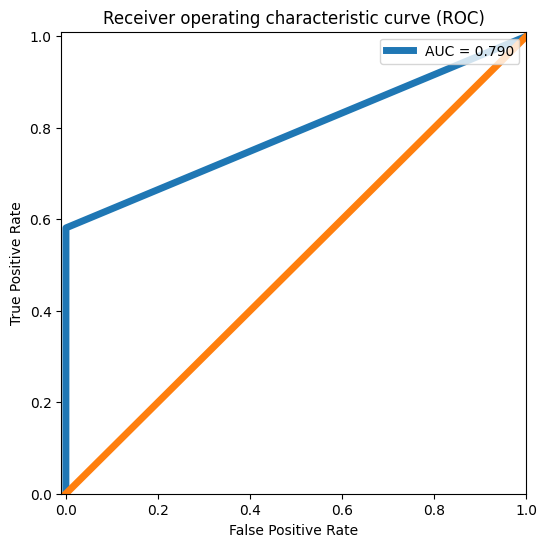

In [51]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Precision : 0.85
- Recall : 0.59
- F1-score : 0.70
- Accuracy : 0.99
- ROC AUC : 0.79

### Random Forest

#### Model 3 : Random Forest on Imbalanced Data

In [52]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [53]:
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train,y_train)
y_predicted = model_rfc.predict(X_test)

In [54]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.70      0.80       148

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85288     7]
 [   44   104]]
Logistic Regression Accuracy:  0.999403110845827
ROC AUC :  0.8513103172930829


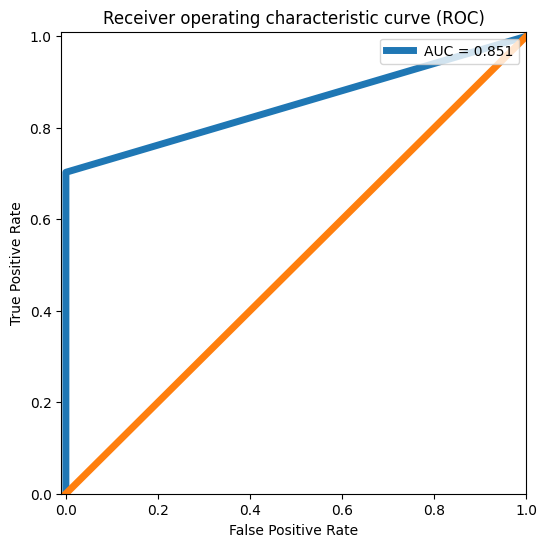

In [55]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Precision : 0.94
- Recall : 0.70
- F1-score : 0.80
- Accuracy : 0.99
- ROC AUC : 0.85

#### Hyperparameter Tuning Random Forest

#### Model 4 : Random Forest on Imbalanced Data with K-Fold and Hyperparamater Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Defining Parameters
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [58]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train, y_train)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')


In [62]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='gini',
                               max_depth=5,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               n_estimators=200,
                               n_jobs=-1, 
                               random_state=5)

In [63]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned.fit(X_train,y_train)
y_predicted = model_rfc_tuned.predict(X_test)

In [64]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.71      0.76       148

    accuracy                           1.00     85443
   macro avg       0.91      0.85      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85271    24]
 [   43   105]]
Logistic Regression Accuracy:  0.9992158515033414
ROC AUC :  0.8545890415299524


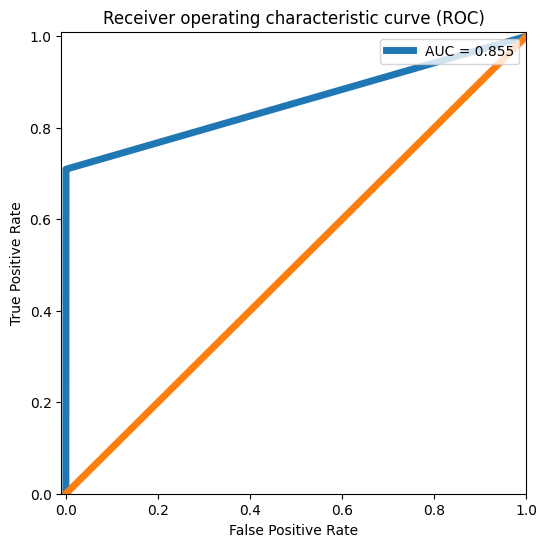

In [65]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

#### Inference:
- Precision : 0.81
- Recall : 0.71
- F1-score : 0.76
- Accuracy : 0.99
- ROC AUC : 0.85